In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os

In [2]:
train_dir="data/train"
test_dir="data/test"

In [3]:
classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

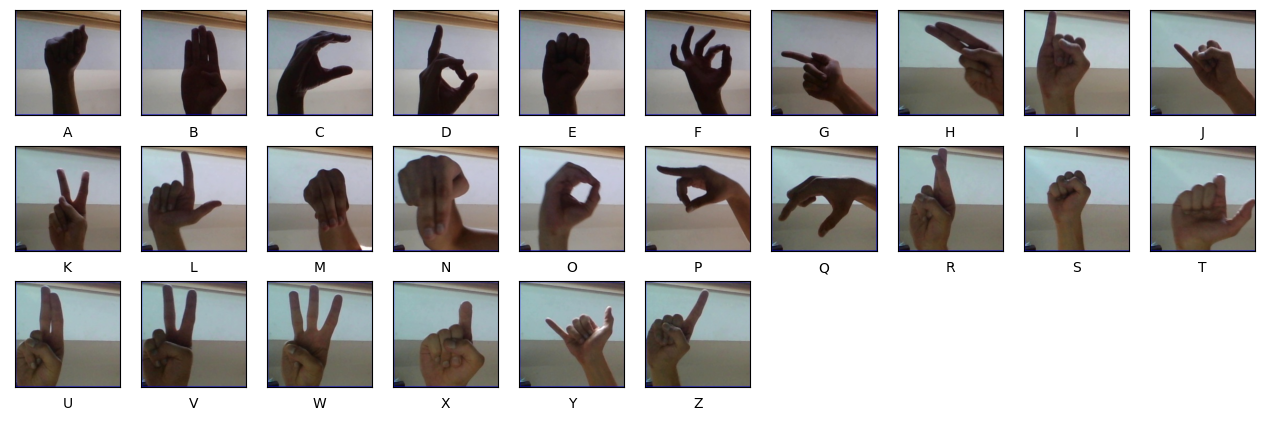

In [4]:
def plot_sample_img():
    plt.figure(figsize=(16,5))
    for i in range(len(classes)):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path=train_dir+"/{0}/{0}2.jpg".format(classes[i])
        img=plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])

plot_sample_img()

In [5]:
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=26, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory('data2/train',
                                                 target_size=(128, 128),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data2/test',
                                            target_size=(128 , 128),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 77220 images belonging to 26 classes.
Found 780 images belonging to 26 classes.


In [11]:
cnn_history=classifier.fit(training_set,
                           validation_data=test_set,
                           steps_per_epoch=training_set.samples/training_set.batch_size,
                           validation_steps=test_set.samples/test_set.batch_size,
                           epochs=10)

Epoch 1/10
  72/7722 [..............................] - ETA: 1:07:57 - loss: 3.2597 - accuracy: 0.0417

KeyboardInterrupt: 

In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [ ]:
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('model.h5')